In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow import keras
from keras.datasets import fashion_mnist
from keras.models import Sequential
from keras.layers import BatchNormalization, Conv2D, Dense, Dropout, Flatten, MaxPooling2D
from keras.utils import to_categorical
from sklearn.metrics import classification_report

In [ ]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

print("x_train shape:", x_train.shape, "y_train shape:", y_train.shape)
print(x_train.shape[0], 'train set')
print(x_test.shape[0], 'test set')

x_train shape: (60000, 28, 28) y_train shape: (60000,)
60000 train set
10000 test set


In [ ]:
x_train, x_test = x_train / 255.0, x_test / 255.0

y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

In [ ]:
model = Sequential()
model.add(Conv2D(64, (5, 5),
                    padding="same",
                    activation="relu",
                    input_shape=(28, 28, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, (5, 5), padding="same",
                    activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, (5, 5), padding="same",
                    activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(32, activation="relu"))
model.add(Dense(10, activation="softmax"))

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 28, 28, 64)        1664      
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 14, 14, 64)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 14, 14, 128)       204928    
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 7, 7, 128)        0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 7, 7, 128)         409728    
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 3, 3, 128)       

In [ ]:
EPOCHS = 8
BATCH_SIZE=128

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=EPOCHS, batch_size=BATCH_SIZE, validation_split=0.2)

Epoch 1/8
375/375 [==============================] - 533s 1s/step - loss: 0.5454 - accuracy: 0.8022 - val_loss: 0.3886 - val_accuracy: 0.8662
Epoch 2/8
375/375 [==============================] - 527s 1s/step - loss: 0.3126 - accuracy: 0.8867 - val_loss: 0.2834 - val_accuracy: 0.8969
Epoch 3/8
375/375 [==============================] - 522s 1s/step - loss: 0.2635 - accuracy: 0.9040 - val_loss: 0.2829 - val_accuracy: 0.8975
Epoch 4/8
375/375 [==============================] - 534s 1s/step - loss: 0.2300 - accuracy: 0.9165 - val_loss: 0.2587 - val_accuracy: 0.9073
Epoch 5/8
375/375 [==============================] - 529s 1s/step - loss: 0.2036 - accuracy: 0.9248 - val_loss: 0.2412 - val_accuracy: 0.9119
Epoch 6/8
375/375 [==============================] - 526s 1s/step - loss: 0.1814 - accuracy: 0.9346 - val_loss: 0.2413 - val_accuracy: 0.9137
Epoch 7/8
375/375 [==============================] - 526s 1s/step - loss: 0.1577 - accuracy: 0.9431 - val_loss: 0.2372 - val_accuracy: 0.9194
Epoch 

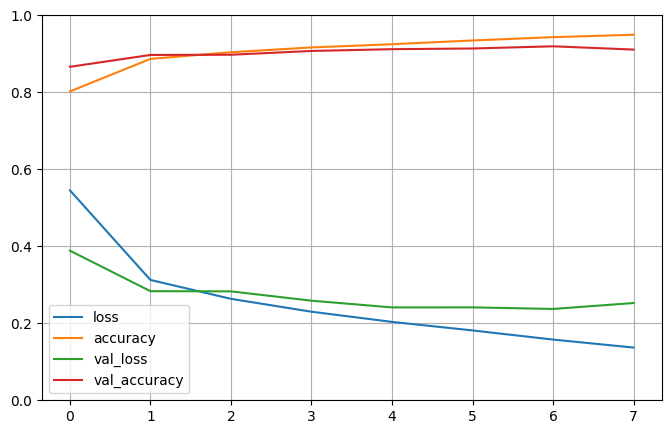

In [ ]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [ ]:
train_loss, train_accuracy = model.evaluate(x_train, y_train)
print(f"Train loss: {train_loss:.4f}")
print(f"Train accuracy: {train_accuracy:.4f}")

test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f"Test loss: {test_loss:.4f}")
print(f"Test accuracy: {test_accuracy:.4f}")

1875/1875 [==============================] - 162s 86ms/step - loss: 0.1475 - accuracy: 0.9460
Train loss: 0.1475
Train accuracy: 0.9460
313/313 [==============================] - 27s 86ms/step - loss: 0.2656 - accuracy: 0.9109
Test loss: 0.2656
Test accuracy: 0.9109


313/313 [==============================] - 47s 150ms/step


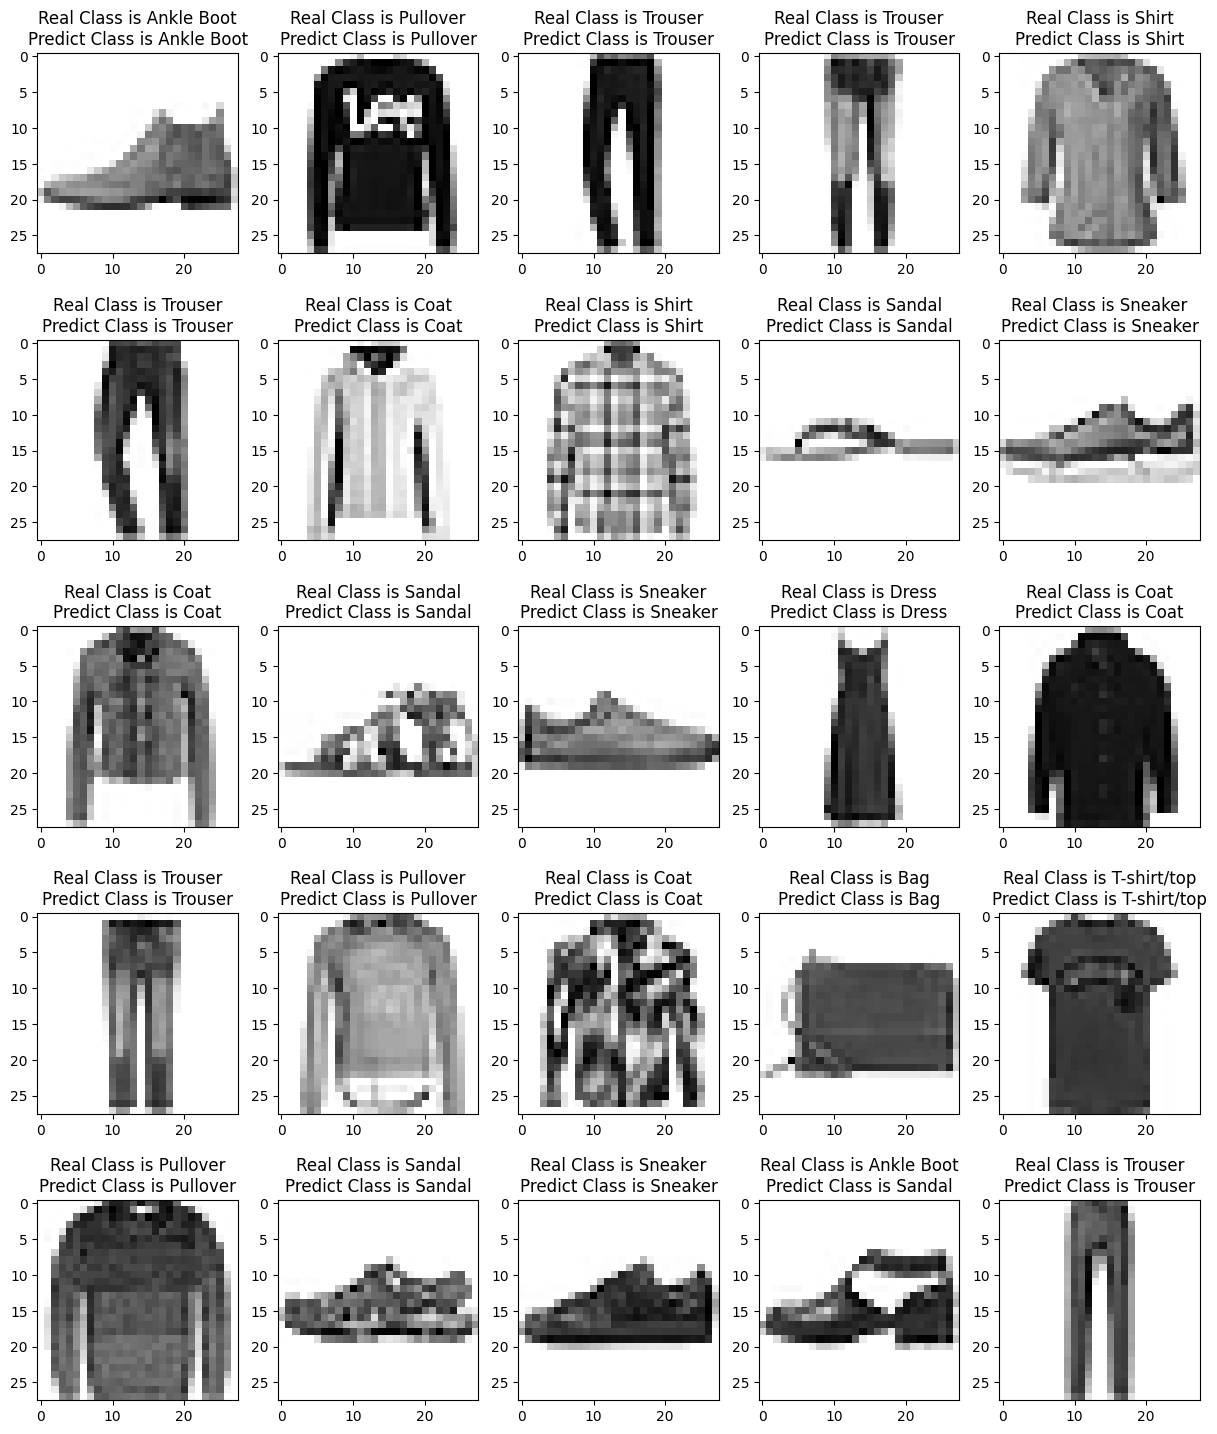

In [ ]:
labels = {0 : "T-shirt/top", 1: "Trouser", 2: "Pullover", 3: "Dress", 4: "Coat",
          5: "Sandal", 6: "Shirt", 7: "Sneaker", 8: "Bag", 9: "Ankle Boot"}

y_pred = model.predict(x_test)
x_test__ = x_test.reshape(x_test.shape[0], 28, 28)

fig, axis = plt.subplots(5, 5, figsize=(15, 18))
for i, ax in enumerate(axis.flat):
    ax.imshow(x_test__[i], cmap='binary')
    ax.set(title = f"Real Class is {labels[y_test[i].argmax()]}\nPredict Class is {labels[y_pred[i].argmax()]}")

In [ ]:
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)
report = classification_report(y_true_classes, y_pred_classes, target_names=class_names)
print(report)

              precision    recall  f1-score   support

 T-shirt/top       0.89      0.82      0.85      1000
     Trouser       0.99      0.98      0.99      1000
    Pullover       0.86      0.86      0.86      1000
       Dress       0.86      0.95      0.90      1000
        Coat       0.88      0.83      0.85      1000
      Sandal       0.98      0.99      0.98      1000
       Shirt       0.73      0.77      0.75      1000
     Sneaker       0.97      0.96      0.97      1000
         Bag       0.99      0.97      0.98      1000
  Ankle boot       0.97      0.98      0.97      1000

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000

